In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Gabung semua group menjadi 1 tabel data
groups = []

for i in range(1, 6):
    filename = f"FINAL FOOD DATASET/FOOD-DATA-GROUP{i}.csv"
    df = pd.read_csv(filename).drop(["Unnamed: 0", "Unnamed: 0.1"], axis=1)
    groups.append(df)

group1, group2, group3, group4, group5 = groups

data = pd.concat(groups).reset_index(drop=True)
data.head()

,food,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,Protein,Dietary Fiber,...,Calcium,Copper,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc,Nutrition Density
0,cream cheese,51,5.0,2.9,1.3,0.200,0.8,0.500,0.9,0.0,...,0.008,14.100,0.082,0.027,1.300,0.091,15.5,19.100,0.039,7.070
1,neufchatel cheese,215,19.4,10.9,4.9,0.800,3.1,2.700,7.8,0.0,...,99.500,0.034,0.100,8.500,0.088,117.300,129.2,0.054,0.700,130.100
2,requeijao cremoso light catupiry,49,3.6,2.3,0.9,0.000,0.9,3.400,0.8,0.1,...,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,5.400
3,ricotta cheese,30,2.0,1.3,0.5,0.002,1.5,0.091,1.5,0.0,...,0.097,41.200,0.097,0.096,4.000,0.024,30.8,43.800,0.035,5.196
4,cream cheese low fat,30,2.3,1.4,0.6,0.042,1.2,0.900,1.2,0.0,...,22.200,0.072,0.008,1.200,0.098,22.800,37.1,0.034,0.053,27.007


# Macronutrients Analysis

In [3]:
macronutrients = ["Carbohydrates", "Protein", "Fat"]
def plot_macronutrients(data, group_name):
    plt.figure(figsize=(12, 6))
    for macronutrient in macronutrients:
        sns.kdeplot(data[macronutrient], label=macronutrient)
    plt.title(f"Distribution of Macronutrients - {group_name}")
    plt.xlabel("Value")
    plt.ylabel("Density")
    plt.legend()
    plt.show()

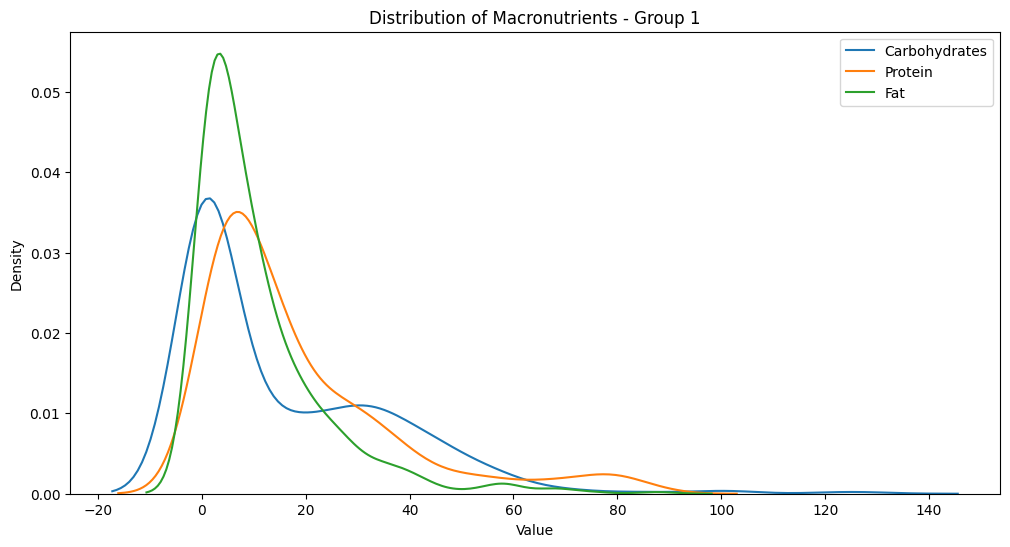

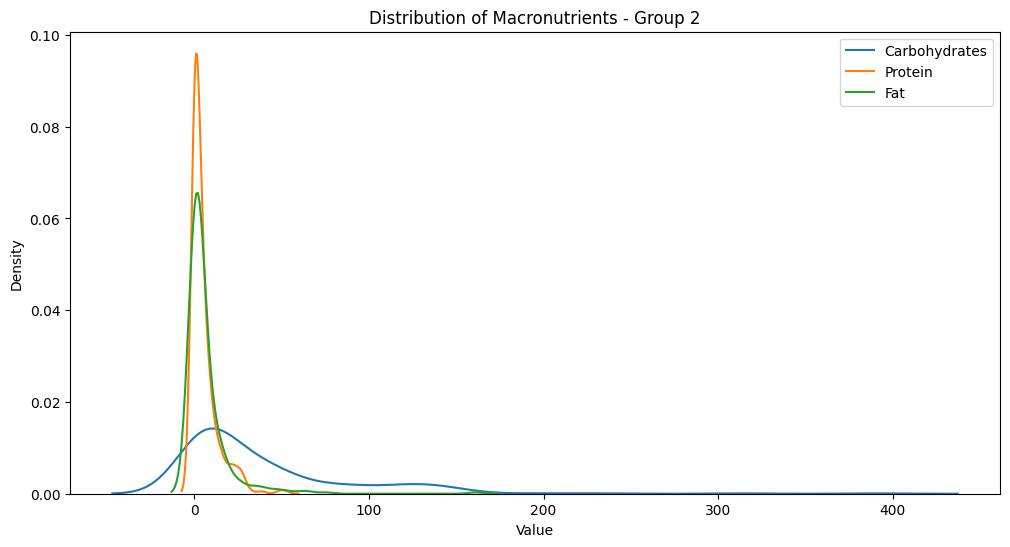

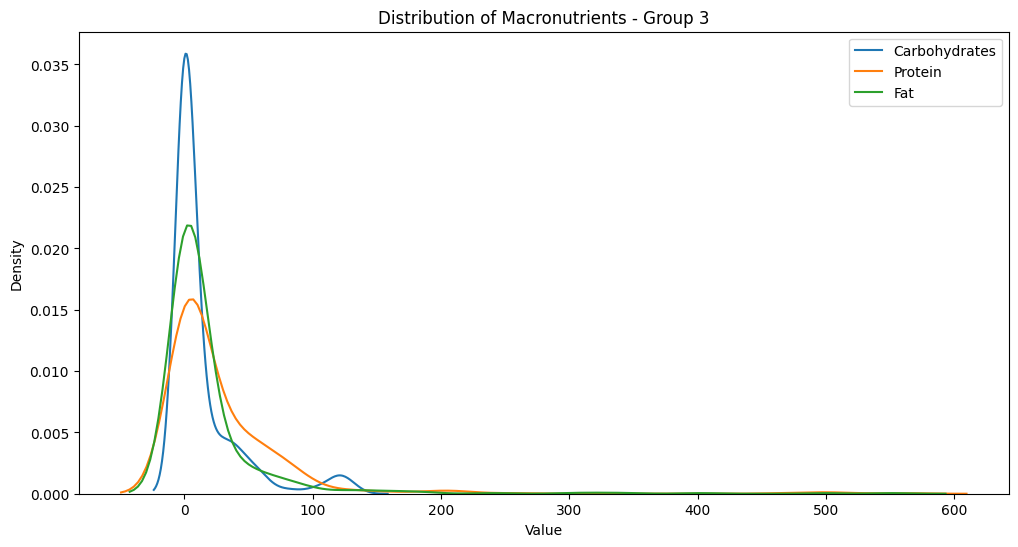

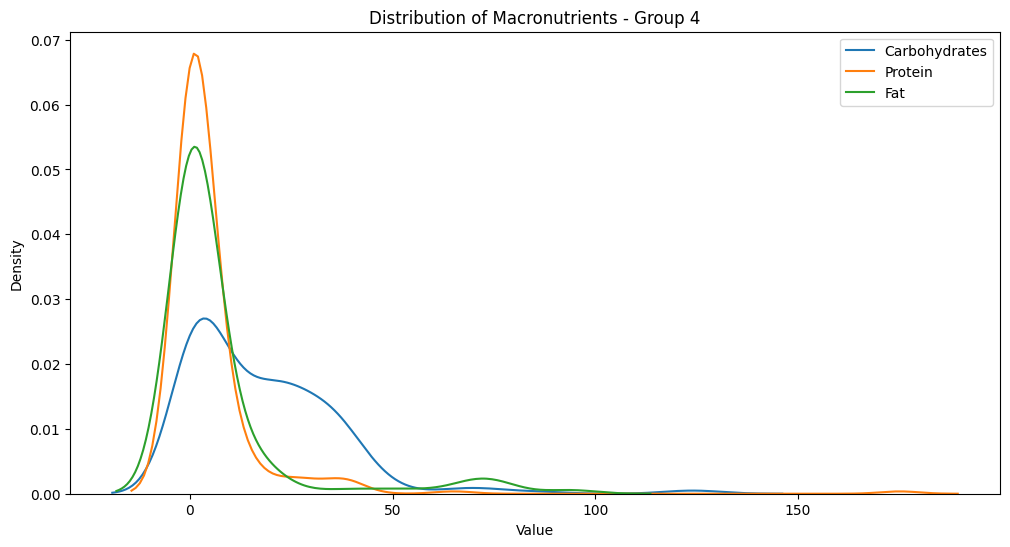

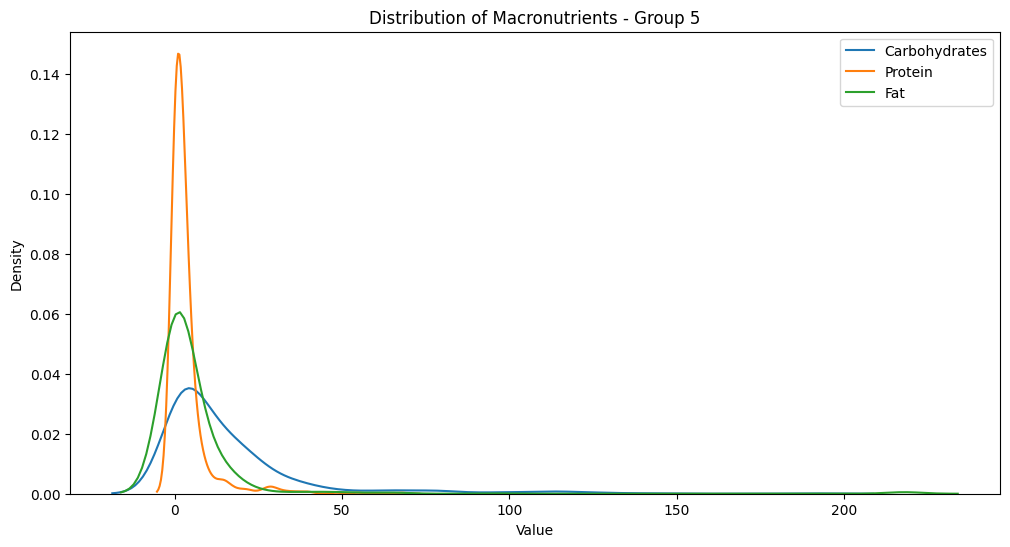

In [4]:
# Analisa distribusi macronutrients menggunakan kde plot
plot_macronutrients(group1, "Group 1")
plot_macronutrients(group2, "Group 2")
plot_macronutrients(group3, "Group 3")
plot_macronutrients(group4, "Group 4")
plot_macronutrients(group5, "Group 5")

# Create new Column: Fat category

In [5]:
# Membuat kolom 'Fats category'
def categorize_fats(fats):
    if fats < 5:
        return 'Low fats'
    elif 5 <= fats <= 15:
        return 'Moderate fats'
    else:
        return 'High fats'

# Menambahkan kolom 'Fats category' ke dataframe
data['Fats category'] = data['Fat'].apply(categorize_fats)

# Menampilkan 5 baris pertama dari data untuk memverifikasi kolom baru
data.head()

,food,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,Protein,Dietary Fiber,...,Copper,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc,Nutrition Density,Fats category
0,cream cheese,51,5.0,2.9,1.3,0.200,0.8,0.500,0.9,0.0,...,14.100,0.082,0.027,1.300,0.091,15.5,19.100,0.039,7.070,Moderate fats
1,neufchatel cheese,215,19.4,10.9,4.9,0.800,3.1,2.700,7.8,0.0,...,0.034,0.100,8.500,0.088,117.300,129.2,0.054,0.700,130.100,High fats
2,requeijao cremoso light catupiry,49,3.6,2.3,0.9,0.000,0.9,3.400,0.8,0.1,...,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,5.400,Low fats
3,ricotta cheese,30,2.0,1.3,0.5,0.002,1.5,0.091,1.5,0.0,...,41.200,0.097,0.096,4.000,0.024,30.8,43.800,0.035,5.196,Low fats
4,cream cheese low fat,30,2.3,1.4,0.6,0.042,1.2,0.900,1.2,0.0,...,0.072,0.008,1.200,0.098,22.800,37.1,0.034,0.053,27.007,Low fats


# ANOVA F-Test

In [6]:
from scipy.stats import f_oneway

In [7]:
low_fats = data[data['Fats category'] == 'Low fats']
moderate_fats = data[data['Fats category'] == 'Moderate fats']
high_fats = data[data['Fats category'] == 'High fats']

significant_columns = []

for col in data.select_dtypes(include=[np.number]).columns:
    f_statistic, p_value = f_oneway(
        low_fats[col],
        moderate_fats[col],
        high_fats[col]
    )

    print(f"F-statistic: {f_statistic}, p-value: {p_value}")
    # Interpretasi hasil ANOVA
    if p_value < 0.05:
        print(f"Ada perbedaan yang signifikan dalam kadar {col} antar kategori lemak.")
        significant_columns.append((p_value, col))
    else:
        print(f"Tidak ada perbedaan yang signifikan dalam kadar {col} antar kategori lemak.")

    print("-" * 50)

significant_columns = pd.DataFrame(np.array(sorted(significant_columns)), columns=["p-value (low 2 high)", "Column"])

F-statistic: 575.7833886519959, p-value: 7.368559535934627e-205
Ada perbedaan yang signifikan dalam kadar Caloric Value antar kategori lemak.
--------------------------------------------------
F-statistic: 590.2041561103922, p-value: 4.5383772912911143e-209
Ada perbedaan yang signifikan dalam kadar Fat antar kategori lemak.
--------------------------------------------------
F-statistic: 133.87100581430593, p-value: 7.767976554760817e-56
Ada perbedaan yang signifikan dalam kadar Saturated Fats antar kategori lemak.
--------------------------------------------------
F-statistic: 399.1974205202099, p-value: 2.514329420760458e-150
Ada perbedaan yang signifikan dalam kadar Monounsaturated Fats antar kategori lemak.
--------------------------------------------------
F-statistic: 226.0907976159215, p-value: 1.1625425212683517e-90
Ada perbedaan yang signifikan dalam kadar Polyunsaturated Fats antar kategori lemak.
--------------------------------------------------
F-statistic: 9.71187212438514

In [8]:
significant_columns

,p-value (low 2 high),Column
0,4.5383772912911143e-209,Fat
1,7.368559535934627e-205,Caloric Value
2,2.514329420760458e-150,Monounsaturated Fats
3,9.081442230706488e-117,Phosphorus
4,2.5981119882632827e-112,Protein
5,2.2461072962784184e-102,Nutrition Density
6,1.5329498048175003e-92,Vitamin B3
7,1.1625425212683517e-90,Polyunsaturated Fats
8,1.0735720488793634e-67,Calcium
9,4.565020090358063e-64,Zinc


In [9]:
significant_columns.Column.iloc[:14][~significant_columns.Column.str.contains("Fats")].drop(8, axis=0).reset_index(drop=True)

0                  Fat
1        Caloric Value
2           Phosphorus
3              Protein
4    Nutrition Density
5           Vitamin B3
6                 Zinc
7            Potassium
8           Vitamin B6
9            Magnesium
Name: Column, dtype: object

In [10]:
significant_columns.iloc[:14][~significant_columns.Column.str.contains("Fats")].drop(5, axis=0).reset_index(drop=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21760\3405545145.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  significant_columns.iloc[:14][~significant_columns.Column.str.contains("Fats")].drop(5, axis=0).reset_index(drop=True)


,p-value (low 2 high),Column
0,4.5383772912911143e-209,Fat
1,7.368559535934627e-205,Caloric Value
2,9.081442230706488e-117,Phosphorus
3,2.5981119882632827e-112,Protein
4,1.5329498048175003e-92,Vitamin B3
5,1.0735720488793634e-67,Calcium
6,4.565020090358063e-64,Zinc
7,9.696128029870308e-58,Potassium
8,1.855981473491327e-48,Vitamin B6
9,7.995790120367289e-44,Magnesium


# Data transformation

In [11]:
from sklearn.preprocessing import StandardScaler, PowerTransformer, QuantileTransformer

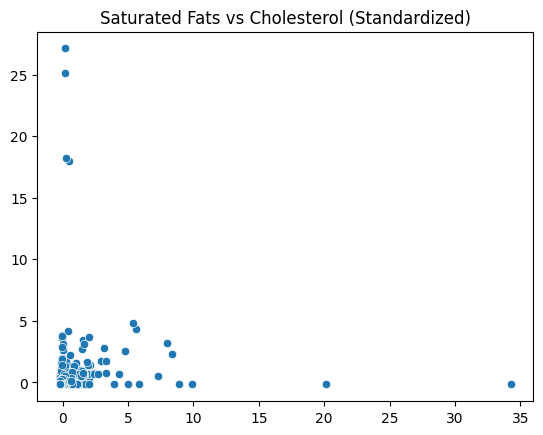

Correlation: 11.24%


In [12]:
# Saturated fats VS Cholesterol
scaler = StandardScaler()
scaler.fit(data[['Saturated Fats', 'Cholesterol']])
scaled_data = scaler.transform(data[['Saturated Fats', 'Cholesterol']])

sns.scatterplot(x=scaled_data[:, 0], y=scaled_data[:, 1])
plt.title('Saturated Fats vs Cholesterol (Standardized)')
plt.show()

print(f"Correlation: {round(pd.DataFrame(scaled_data, columns=['Saturated Fats', 'Cholesterol']).corr().iloc[0,1] * 100, 2)}%")

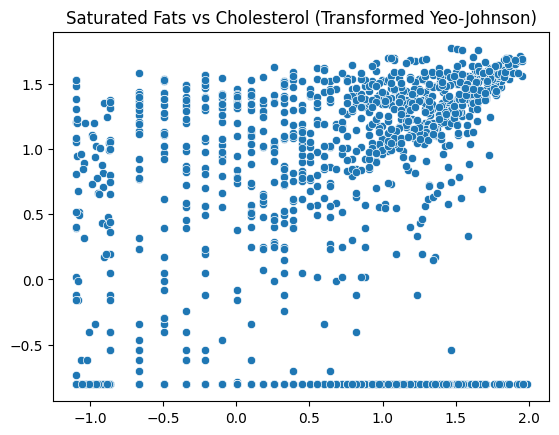

Correlation: 63.97%


In [13]:
power_transformer = PowerTransformer(method='yeo-johnson')
power_transformer.fit(data[['Saturated Fats', 'Cholesterol']])
powerTransformed_data = power_transformer.transform(data[['Saturated Fats', 'Cholesterol']])

sns.scatterplot(x=powerTransformed_data[:, 0], y=powerTransformed_data[:, 1])
plt.title('Saturated Fats vs Cholesterol (Transformed Yeo-Johnson)')
plt.show()

print(f"Correlation: {round(pd.DataFrame(powerTransformed_data, columns=['Saturated Fats', 'Cholesterol']).corr().iloc[0,1] * 100, 2)}%")

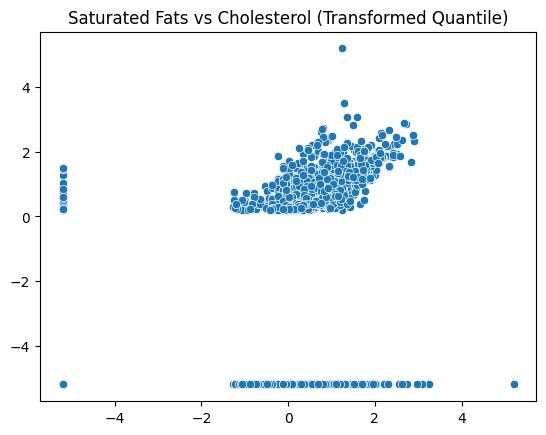

Correlation: 45.48%


In [14]:
quantile_transformer = QuantileTransformer(output_distribution='normal')
quantile_transformer.fit(data[['Saturated Fats', 'Cholesterol']])
quantileTransformed_data = quantile_transformer.transform(data[['Saturated Fats', 'Cholesterol']])

sns.scatterplot(x=quantileTransformed_data[:, 0], y=quantileTransformed_data[:, 1])
plt.title('Saturated Fats vs Cholesterol (Transformed Quantile)')
plt.show()

print(f"Correlation: {round(pd.DataFrame(quantileTransformed_data, columns=['Saturated Fats', 'Cholesterol']).corr().iloc[0,1] * 100, 2)}%")

**Transformasi terbaik adalah Power Transformer dengan metode Yeo-Johnson**

In [15]:
power_transformer = PowerTransformer(method='yeo-johnson')
power_transformer.fit(data[significant_columns.Column])
powerTransformed_data = power_transformer.transform(data[significant_columns.Column])
powerTransformed_data = pd.DataFrame(powerTransformed_data, columns=significant_columns.Column)

corr_matrix_power = powerTransformed_data.corr()
corr_matrix_power.style.background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)

Column,Fat,Caloric Value,Monounsaturated Fats,Phosphorus,Protein,Nutrition Density,Vitamin B3,Polyunsaturated Fats,Calcium,Zinc,Potassium,Saturated Fats,Vitamin B6,Magnesium,Vitamin B5,Vitamin E,Cholesterol,Water,Iron,Vitamin B2,Sodium,Vitamin B1,Vitamin D,Carbohydrates,Dietary Fiber
Column,,,,,,,,,,,,,,,,,,,,,,,,,
Fat,1.000000,0.751348,0.921158,0.508858,0.648741,0.537372,0.520632,0.851766,0.377978,0.561533,0.409032,0.929249,0.327639,0.403117,0.435256,0.317816,0.617047,0.115614,0.474417,0.516908,0.422678,0.461867,-0.145251,-0.021700,-0.077769
Caloric Value,0.751348,1.000000,0.659349,0.569479,0.715251,0.762495,0.603792,0.681793,0.437070,0.617191,0.584521,0.679361,0.487859,0.555701,0.557415,0.286123,0.423165,0.360037,0.616349,0.540559,0.374086,0.546271,-0.117530,0.342968,0.169822
Monounsaturated Fats,0.921158,0.659349,1.000000,0.403658,0.525136,0.397246,0.429941,0.844185,0.283762,0.465684,0.276815,0.918366,0.229211,0.277675,0.333844,0.277404,0.586002,0.037174,0.362901,0.441572,0.367824,0.372979,-0.156445,-0.107271,-0.170194
Phosphorus,0.508858,0.569479,0.403658,1.000000,0.740391,0.716309,0.803514,0.448415,0.832050,0.883085,0.765025,0.431087,0.413465,0.894064,0.393778,0.414608,0.474299,0.353831,0.800265,0.759243,0.416443,0.707305,-0.402125,0.101668,0.047640
Protein,0.648741,0.715251,0.525136,0.740391,1.000000,0.703915,0.764767,0.577753,0.550644,0.773978,0.777156,0.561673,0.646013,0.700707,0.708553,0.251465,0.649179,0.490618,0.719102,0.669906,0.489163,0.619229,-0.065512,0.055616,0.078641
Nutrition Density,0.537372,0.762495,0.397246,0.716309,0.703915,1.000000,0.608611,0.465895,0.803173,0.677728,0.727991,0.449341,0.451941,0.750084,0.492005,0.340083,0.341693,0.479158,0.725705,0.637273,0.463623,0.566570,-0.207867,0.421515,0.312388
Vitamin B3,0.520632,0.603792,0.429941,0.803514,0.764767,0.608611,1.000000,0.505050,0.609921,0.785743,0.729409,0.436780,0.555000,0.767914,0.530060,0.342565,0.473458,0.408077,0.793757,0.740750,0.414851,0.759195,-0.289634,0.097250,0.079027
Polyunsaturated Fats,0.851766,0.681793,0.844185,0.448415,0.577753,0.465895,0.505050,1.000000,0.324373,0.491161,0.387221,0.759422,0.333420,0.393874,0.430652,0.331432,0.450870,0.090077,0.464480,0.451373,0.363784,0.453930,-0.131020,0.054751,0.017217
Calcium,0.377978,0.437070,0.283762,0.832050,0.550644,0.803173,0.609921,0.324373,1.000000,0.711570,0.648604,0.323064,0.230481,0.802750,0.245554,0.384564,0.325883,0.344121,0.714571,0.675881,0.445276,0.582415,-0.429357,0.239221,0.145419


In [16]:
quantile_transformer = QuantileTransformer(output_distribution='normal')
quantile_transformer.fit(data[significant_columns.Column])
quantileTransformed_data = quantile_transformer.transform(data[significant_columns.Column])
quantileTransformed_data = pd.DataFrame(quantileTransformed_data, columns=significant_columns.Column)

corr_matrix_quantile = quantileTransformed_data.corr()
corr_matrix_quantile.style.background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)

Column,Fat,Caloric Value,Monounsaturated Fats,Phosphorus,Protein,Nutrition Density,Vitamin B3,Polyunsaturated Fats,Calcium,Zinc,Potassium,Saturated Fats,Vitamin B6,Magnesium,Vitamin B5,Vitamin E,Cholesterol,Water,Iron,Vitamin B2,Sodium,Vitamin B1,Vitamin D,Carbohydrates,Dietary Fiber
Column,,,,,,,,,,,,,,,,,,,,,,,,,
Fat,1.000000,0.595396,0.736349,0.396675,0.491227,0.496679,0.459436,0.697771,0.303805,0.362769,0.364377,0.762817,0.379514,0.346392,0.366934,0.262173,0.472656,0.093885,0.387198,0.401781,0.303148,0.404795,0.102399,-0.149969,-0.013931
Caloric Value,0.595396,1.000000,0.481369,0.366972,0.488928,0.737960,0.365283,0.456213,0.264044,0.362049,0.376906,0.487530,0.287317,0.329098,0.306338,0.147575,0.366724,0.229084,0.388770,0.359648,0.211910,0.355884,-0.018456,0.007982,-0.026481
Monounsaturated Fats,0.736349,0.481369,1.000000,0.271072,0.324465,0.315486,0.321527,0.897648,0.203726,0.293892,0.234428,0.888133,0.273361,0.216187,0.308362,0.254498,0.436978,-0.011033,0.256361,0.296883,0.184776,0.300399,0.099422,-0.172094,-0.055639
Phosphorus,0.396675,0.366972,0.271072,1.000000,0.737235,0.561473,0.806716,0.348685,0.731053,0.833339,0.867819,0.276459,0.707838,0.887585,0.569557,0.283033,0.339813,0.612408,0.831945,0.696298,0.654296,0.666298,0.008831,0.049838,0.092661
Protein,0.491227,0.488928,0.324465,0.737235,1.000000,0.593025,0.778217,0.402294,0.543247,0.665004,0.746747,0.338867,0.672741,0.707668,0.625019,0.174245,0.453752,0.624437,0.746503,0.571283,0.601554,0.546596,0.124764,0.010743,0.099494
Nutrition Density,0.496679,0.737960,0.315486,0.561473,0.593025,1.000000,0.515453,0.362236,0.607776,0.533757,0.577939,0.345238,0.401392,0.577140,0.358614,0.223763,0.291354,0.444746,0.598178,0.542925,0.421772,0.516629,-0.086161,0.166003,0.124649
Vitamin B3,0.459436,0.365283,0.321527,0.806716,0.778217,0.515453,1.000000,0.406471,0.654142,0.747495,0.820674,0.327516,0.768906,0.814784,0.674018,0.268827,0.350748,0.618424,0.804632,0.722802,0.641957,0.712553,0.044833,0.025768,0.137106
Polyunsaturated Fats,0.697771,0.456213,0.897648,0.348685,0.402294,0.362236,0.406471,1.000000,0.272283,0.362577,0.333087,0.821811,0.341844,0.319150,0.375505,0.267698,0.373765,0.096142,0.357020,0.330682,0.267222,0.338937,0.094320,-0.067799,0.042196
Calcium,0.303805,0.264044,0.203726,0.731053,0.543247,0.607776,0.654142,0.272283,1.000000,0.702320,0.688219,0.212994,0.473075,0.740623,0.370104,0.288338,0.260594,0.514047,0.712750,0.702336,0.588406,0.697587,-0.112387,0.149456,0.126265


In [17]:
highest_corr_power = corr_matrix_power.abs().unstack().sort_values(ascending=False).drop_duplicates()
highest_corr_power = highest_corr_power[highest_corr_power < 1]
highest_corr_power = highest_corr_power[highest_corr_power >= 0.7]
# highest_corr_power = pd.Series(np.unique(highest_corr_power.index.to_list()))
display(highest_corr_power, len(highest_corr_power))

Column                Column              
Fat                   Saturated Fats          0.929249
Monounsaturated Fats  Fat                     0.921158
                      Saturated Fats          0.918366
Magnesium             Phosphorus              0.894064
Zinc                  Phosphorus              0.883085
Polyunsaturated Fats  Fat                     0.851766
                      Monounsaturated Fats    0.844185
Magnesium             Potassium               0.843748
Phosphorus            Calcium                 0.832050
Zinc                  Magnesium               0.815890
Iron                  Magnesium               0.813288
Zinc                  Iron                    0.805555
Vitamin B3            Phosphorus              0.803514
Calcium               Nutrition Density       0.803173
Magnesium             Calcium                 0.802750
Phosphorus            Iron                    0.800265
Vitamin B3            Iron                    0.793757
Zinc                  

51

In [18]:
highest_corr_quantile = corr_matrix_quantile.abs().unstack().sort_values(ascending=False).drop_duplicates()
highest_corr_quantile = highest_corr_quantile[highest_corr_quantile < 1]
highest_corr_quantile = highest_corr_quantile[highest_corr_quantile >= 0.7]
# highest_corr_quantile = pd.Series(np.unique(highest_corr_quantile.index.to_list()))

display(highest_corr_quantile, len(highest_corr_quantile))

Column                Column              
Polyunsaturated Fats  Monounsaturated Fats    0.897648
Magnesium             Potassium               0.891917
Saturated Fats        Monounsaturated Fats    0.888133
Phosphorus            Magnesium               0.887585
Vitamin B2            Vitamin B1              0.875208
Potassium             Phosphorus              0.867819
                      Iron                    0.842307
Zinc                  Phosphorus              0.833339
Magnesium             Iron                    0.833226
                      Zinc                    0.832152
Iron                  Phosphorus              0.831945
Saturated Fats        Polyunsaturated Fats    0.821811
Vitamin B3            Potassium               0.820674
Magnesium             Vitamin B3              0.814784
Zinc                  Potassium               0.808783
Vitamin B3            Phosphorus              0.806716
Zinc                  Iron                    0.806451
Iron                  

40

### Anova F-Test

In [19]:
powerTransformed_data_with_category = pd.concat([powerTransformed_data, data["Fats category"]], axis=1)

low_fats = powerTransformed_data_with_category[powerTransformed_data_with_category['Fats category'] == 'Low fats']
moderate_fats = powerTransformed_data_with_category[powerTransformed_data_with_category['Fats category'] == 'Moderate fats']
high_fats = powerTransformed_data_with_category[powerTransformed_data_with_category['Fats category'] == 'High fats']

significant_columns = []

for col in powerTransformed_data_with_category.select_dtypes(include=[np.number]).columns:
    f_statistic, p_value = f_oneway(
        low_fats[col],
        moderate_fats[col],
        high_fats[col]
    )

    print(f"F-statistic: {f_statistic}, p-value: {p_value}")
    
    if p_value < 0.05:
        print(f"Ada perbedaan yang signifikan dalam kadar {col} antar kategori lemak.")
        significant_columns.append((p_value, col))
    else:
        print(f"Tidak ada perbedaan yang signifikan dalam kadar {col} antar kategori lemak.")

    print("-" * 50)

significant_columns = pd.DataFrame(np.array(sorted(significant_columns)), columns=["p-value (low 2 high)", "Column"])

F-statistic: 3789.111632204165, p-value: 0.0
Ada perbedaan yang signifikan dalam kadar Fat antar kategori lemak.
--------------------------------------------------
F-statistic: 953.8676499852199, p-value: 2.523876430143018e-305
Ada perbedaan yang signifikan dalam kadar Caloric Value antar kategori lemak.
--------------------------------------------------
F-statistic: 3249.3801723045262, p-value: 0.0
Ada perbedaan yang signifikan dalam kadar Monounsaturated Fats antar kategori lemak.
--------------------------------------------------
F-statistic: 260.7555376756792, p-value: 3.5976951159829413e-103
Ada perbedaan yang signifikan dalam kadar Phosphorus antar kategori lemak.
--------------------------------------------------
F-statistic: 488.02806518473596, p-value: 1.7893619956730716e-178
Ada perbedaan yang signifikan dalam kadar Protein antar kategori lemak.
--------------------------------------------------
F-statistic: 392.735988718675, p-value: 3.22565285516156e-148
Ada perbedaan yang 

In [20]:
significant_columns

,p-value (low 2 high),Column
0,0.0,Fat
1,0.0,Monounsaturated Fats
2,0.0,Polyunsaturated Fats
3,0.0,Saturated Fats
4,2.523876430143018e-305,Caloric Value
5,1.7893619956730716e-178,Protein
6,4.3350607596087114e-176,Cholesterol
7,1.8912735457363934e-149,Vitamin B2
8,3.22565285516156e-148,Nutrition Density
9,1.4980093097460924e-142,Zinc


### Seleksi Column

In [26]:
highest_corr_power_series = pd.Series(np.array(highest_corr_power.index.to_list()).flatten())
highest_corr_power_series


0                       Fat
1            Saturated Fats
2      Monounsaturated Fats
3                       Fat
4      Monounsaturated Fats
               ...         
97        Nutrition Density
98                     Zinc
99               Vitamin B1
100                 Protein
101               Magnesium
Length: 102, dtype: object

In [27]:
significant_columns_currated = significant_columns[significant_columns.Column.isin(highest_corr_power_series)].reset_index(drop=True)
significant_columns_currated = significant_columns_currated[~significant_columns_currated.Column.str.contains("Fats")].reset_index(drop=True)
significant_columns_currated = significant_columns_currated.drop(4, axis=0)
significant_columns_currated

,p-value (low 2 high),Column
0,0.0,Fat
1,2.523876430143018e-305,Caloric Value
2,1.7893619956730716e-178,Protein
3,1.8912735457363934e-149,Vitamin B2
5,1.4980093097460924e-142,Zinc
6,3.138374622566998e-120,Vitamin B3
7,4.2773506185322636e-104,Iron
8,3.5976951159829413e-103,Phosphorus
9,3.2010726166633953e-99,Vitamin B1
10,1.4022232479898784e-84,Vitamin B5


In [28]:
final_data = powerTransformed_data[significant_columns_currated.Column].copy()
final_data['Fats category'] = data['Fats category'].copy()
final_data

Column,Fat,Caloric Value,Protein,Vitamin B2,Zinc,Vitamin B3,Iron,Phosphorus,Vitamin B1,Vitamin B5,Potassium,Magnesium,Calcium,Vitamin B6,Fats category
0,0.525154,-0.545865,-0.783925,0.136054,-0.975762,-0.956376,-1.036691,-1.357450,-0.534351,-0.897209,-0.880444,-1.494816,-1.361448,-0.241636,Moderate fats
1,1.273715,0.494411,0.511160,0.164306,0.429390,-0.715417,-0.988253,0.619481,0.241307,0.408775,0.115237,-0.049408,1.129002,-0.385940,High fats
2,0.316654,-0.571698,-0.838223,-1.108980,-1.127832,-1.162341,-1.278404,-1.389491,-1.061099,-1.154499,-1.830420,-1.512822,-1.365888,-1.163423,Low fats
3,-0.061433,-0.875474,-0.518231,-0.686236,-0.990749,-1.058034,-0.996220,-1.380782,-0.744215,-1.071604,-0.596099,-1.450942,-1.314331,-1.081800,Low fats
4,0.027751,-0.875474,-0.639961,-0.700666,-0.924340,-0.965522,-1.253168,-0.116291,0.049178,-0.687928,-0.512859,-0.987048,0.351474,-1.128114,Low fats
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2390,-1.207153,-0.982254,-1.026250,0.880342,0.429390,-1.131017,-0.063600,-0.318971,-1.025866,1.525390,-0.449313,0.563779,0.178325,-0.352895,Low fats
2391,-1.202251,-2.275613,-1.404115,-1.108980,-0.775860,-1.107964,-0.990904,-1.384025,-1.061099,-0.321639,-1.392607,-1.490228,-1.365888,-1.163423,Low fats
2392,-1.238344,-1.865602,-1.099429,-1.108980,-0.867477,-1.141383,-1.109443,-1.368072,-1.061099,-0.028187,-0.686284,-0.877512,-1.365888,-0.852242,Low fats
2393,-0.982991,-1.136746,-0.413189,0.164306,0.153274,1.183322,-0.536789,0.509363,-0.130716,1.028405,0.639761,-1.512822,-0.657916,-0.211056,Low fats


Fat category

In [29]:
from lightgbm import LGBMClassifier as Lgbm

In [30]:
# Membuat kolom 'Fats category'
def categorize_fats(fats):
    if fats < 5:
        return 'Low fats'
    elif 5 <= fats <= 15:
        return 'Moderate fats'
    else:
        return 'High fats'

# Menambahkan kolom 'Fats category' ke dataframe
data['Fats category'] = data['Fat'].apply(categorize_fats)

# Menampilkan 5 baris pertama dari data untuk memverifikasi kolom baru
data.head()

,food,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,Protein,Dietary Fiber,...,Copper,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc,Nutrition Density,Fats category
0,cream cheese,51,5.0,2.9,1.3,0.200,0.8,0.500,0.9,0.0,...,14.100,0.082,0.027,1.300,0.091,15.5,19.100,0.039,7.070,Moderate fats
1,neufchatel cheese,215,19.4,10.9,4.9,0.800,3.1,2.700,7.8,0.0,...,0.034,0.100,8.500,0.088,117.300,129.2,0.054,0.700,130.100,High fats
2,requeijao cremoso light catupiry,49,3.6,2.3,0.9,0.000,0.9,3.400,0.8,0.1,...,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,5.400,Low fats
3,ricotta cheese,30,2.0,1.3,0.5,0.002,1.5,0.091,1.5,0.0,...,41.200,0.097,0.096,4.000,0.024,30.8,43.800,0.035,5.196,Low fats
4,cream cheese low fat,30,2.3,1.4,0.6,0.042,1.2,0.900,1.2,0.0,...,0.072,0.008,1.200,0.098,22.800,37.1,0.034,0.053,27.007,Low fats


Save final_data to CSV

In [31]:
# Define the path where the CSV file will be saved
__path__modelling = "final_data.csv"

# Save the final_data DataFrame to the specified path
final_data.to_csv(__path__modelling, index=False)